In [1]:
pip install lightgbm scikit-learn matplotlib

  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install lightgbm eli5 scikit-learn

     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     ----- ------------------------------- 30.7/216.2 kB 325.1 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/216.2 kB 435.7 kB/s eta 0:00:01
     ----------------------- ------------ 143.4/216.2 kB 708.1 kB/s eta 0:00:01
     -------------------------------------- 216.2/216.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107762 sha256=470cd45429f6c48ee139fbf15f43e82425c6c45693579ed4a8e169a1949c92ff
  Stored in directory: c:\users\asas9\appdata\local\pip\cache\wheels\e0\e4\92\b2763717e9a525c427c049221a2fa8fa4d0ec6190bfc587fc8
Successfu

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
#import sys
#sys.path.append('C:/Users/user/Desktop/資料分析/3. 推論分析/機器學習/集成學習')
from LGB import LightGBM as lb1
from LGB-1 import LightGBM as lb2
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('MacroData.csv')

# Convert the '日期' column to datetime and sort by date
df['日期'] = pd.to_datetime(df['日期'], format='%b-%y')
df = df.sort_values('日期').reset_index(drop=True)

# Define the target variable '市半導體' and features (all other columns except '日期' and target)
target = '市半導體'
features = df.drop(columns=['日期', target]).columns
# Split the data into training and testing sets based on a date threshold
split_date = '2023-12-01'
train = df[df['日期'] < split_date]
test = df[df['日期'] >= split_date]

# Prepare the features and target for training and testing
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

params = {
          'boosting_type': 'dart', #生成方式 gbdt, dart, rf 
          'n_estimators' : 100,
          'learning_rate': 0.05,
          'n_jobs' : -1, #執行所有CPU
          'random_state' : 7,
          'verbose' : 0
          }

scoring = {
           'r2_score' : make_scorer(r2_score), 
           'mae' : make_scorer(mean_absolute_error),
           'mape' : make_scorer(mean_absolute_percentage_error), 
           }

param_grid = {
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 7],
              'num_leaves': [15, 31, 63],
              'n_estimators': [100, 200, 50],
              'boosting_type' : ['gbdt','dart'],
              'random_state' : [7], 
              }   

X_train_fs, feature_name = LightGBM.permutation_selection(X_train, y_train, params = params, imp = 0.005, isClassifier=False)
model, cv, cv_idx = LightGBM.build_model(X_train_fs, y_train, params = params, scoring = scoring, fold_time = 5, isClassifier=False)
#model_grid_tune = LightGBM.grid_tune(X_train_fs, y_train, fold_time = 3, param_grid = param_grid, isClassifier=False)
#model_random_tune = LightGBM.random_tune(X_train_fs, y_train, fold_time = 3, param_grid = param_grid, isClassifier=False)


cv['test_mae'].mean()

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

36.21574441786417

In [73]:
model_grid_tune = LightGBM.grid_tune(X_train_fs, y_train, fold_time = 3, param_grid = param_grid, isClassifier=False)
model, cv, cv_idx = LightGBM.build_model(X_train_fs, y_train, params=model_grid_tune.get_params(), scoring=scoring, fold_time=3, isClassifier=False)
cv['test_mae'].mean()

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

10.399924630071459

In [77]:
if model_grid_tune is not None:
    best_params = model_grid_tune.get_params()
    print("网格搜索调优后最佳模型的参数:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

网格搜索调优后最佳模型的参数:
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.1
max_depth: 3
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 150
n_jobs: None
num_leaves: 15
objective: None
random_state: 7
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0


In [71]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 对训练集拟合标准化器并转换
X_test_scaled = scaler.transform(X_test)        # 使用同一个标准化器转换测试集

# 进行特征选择
xtrain_fs, feature_name = LightGBM.permutation_selection(pd.DataFrame(X_train_scaled, columns=features), y_train, params=params, imp=0.005, isClassifier=False)

# 确保特征选择成功
if xtrain_fs is not None and feature_name is not None:
    xtest_fs = pd.DataFrame(X_test_scaled, columns=features)[feature_name]  # 使用相同的特征对测试集进行选择

    # 建模和交叉验证
    model, cv, cv_idx = LightGBM.build_model(xtrain_fs, y_train, params=params, scoring=scoring, fold_time=5, isClassifier=False)

    # 评估 MAE
    if cv is not None and 'test_mae' in cv.columns:
        mae_mean = cv['test_mae'].mean()
        print(f'交叉验证的平均 MAE: {mae_mean}')
    else:
        print("MAE 评估结果未找到，请检查交叉验证结果。")
else:
    print("特征选择失败。")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler

array([[ 2.04171118e-01,  2.06231441e+00, -5.76697307e-01,
        -6.38723707e-01,  1.89907765e+00,  6.61673915e-01,
         6.03608092e-01,  9.84838301e-01,  5.24831392e-01,
         1.14477067e+00,  5.81390538e-01,  2.49869883e+00,
         2.08985899e+00, -6.94228376e-01,  2.10670890e+00,
         8.55590047e-03,  2.67373050e+00, -2.04327038e+00,
         2.06058233e+00,  1.26632362e+00,  2.47422623e+00,
         1.32206886e+00, -1.09405292e+00,  3.10855355e+00,
        -8.61334590e-01,  7.95903822e-01, -8.12942435e-01,
         1.37470765e+00,  1.85999747e+00,  2.45380640e+00,
        -9.40007662e-01,  1.32492016e-01, -4.69142603e-01,
         1.93231744e+00,  2.53365169e+00],
       [ 3.98467757e-01,  2.09274028e+00, -2.01000851e+00,
        -2.66379549e-01,  1.95119546e+00, -3.82017700e-01,
         9.51485588e-01,  1.07061806e+00,  1.01147339e+00,
         1.93057310e+00,  3.59567687e-01,  1.84727583e+00,
         2.72289806e+00,  7.57565849e-02,  2.16109036e+00,
         1.35

In [17]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'测试集 RMSE: {rmse}')

测试集 RMSE: 66.93697766220326


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   日期              159 non-null    datetime64[ns]
 1   市半導體            159 non-null    float64       
 2   製造業營業氣候測驗點      159 non-null    float64       
 3   股價指數            159 non-null    float64       
 4   外銷訂單動向指數        159 non-null    float64       
 5   工業及服務業受僱員工淨進入率  159 non-null    float64       
 6   M1B             159 non-null    int64         
 7   實質半導體設備進口值      159 non-null    int64         
 8   建築物開工樓地板面積      159 non-null    float64       
 9   工業生產指數          159 non-null    float64       
 10  製造業銷售量指數        159 non-null    float64       
 11  實質機械及電機設備進口值    159 non-null    float64       
 12  電力(企業)總用電量      159 non-null    float64       
 13  實質海關出口值         159 non-null    float64       
 14  批發、零售及餐飲業營業額    159 non-null    float64       
 15  工業及服務業

In [21]:
df.shape

(159, 37)

In [25]:
pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.2 kB 960.0 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/456.2 kB 1.8 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.2 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=1


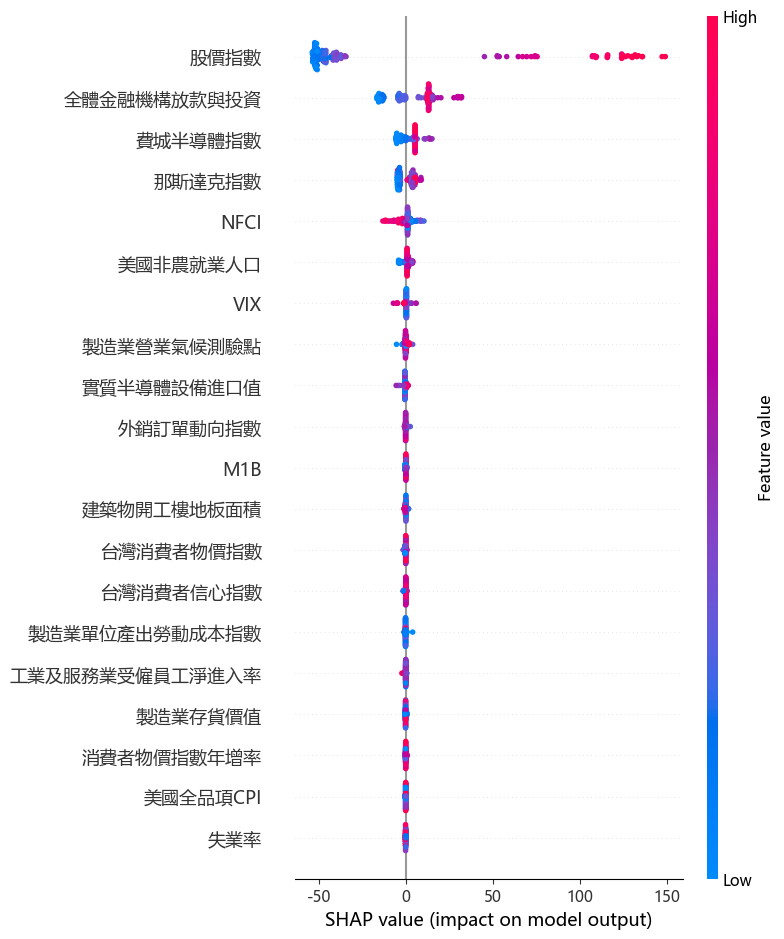

Feature importance based on SHAP:
           Feature  Importance
1             股價指數   62.937356
14     全體金融機構放款與投資   12.215214
34         費城半導體指數    4.492603
33          那斯達克指數    4.151852
31            NFCI    2.704644
28        美國非農就業人口    1.830780
24             VIX    0.690519
0       製造業營業氣候測驗點    0.564253
5       實質半導體設備進口值    0.522863
2         外銷訂單動向指數    0.248772
4              M1B    0.239432
6       建築物開工樓地板面積    0.209296
20       台灣消費者物價指數    0.190174
22       台灣消費者信心指數    0.181977
15   製造業單位產出勞動成本指數    0.163713
3   工業及服務業受僱員工淨進入率    0.117607
18         製造業存貨價值    0.102849
21      消費者物價指數年增率    0.091369
29        美國全品項CPI    0.077042
17             失業率    0.067342
27         全球GPR指數    0.064074
7           工業生產指數    0.063394
16   五大銀行新承做放款平均利率    0.054724
25         中國EPU指數    0.053182
10      電力(企業)總用電量    0.052199
26         美國EPU指數    0.051188
32  CBOE黃金ETF波動率指數    0.048270
8         製造業銷售量指數    0.036567
13      工業及服務業加班工時    0.035901
30       美國消費者信心指數    0.032386
23   

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, RandomizedSearchCV
import shap
import warnings
import matplotlib.pyplot as plt

# 设置 matplotlib 字体为可以显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 适用于 Windows 系统，可以使用其他支持中文的字体名称
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

class LightGBM:    
    
    def shap_feature_importance(train_X, train_Y, params, isClassifier=True):
        """
        使用 SHAP 计算特征重要性
    
        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        params (dict): 模型参数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
    
        Returns:
        DataFrame: 特征重要性。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier(**params)
            else:
                model = lgb.LGBMRegressor(**params)
            
            model.fit(train_X, train_Y)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(train_X)
            
            # 计算特征重要性
            feature_importance_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': np.abs(shap_values).mean(axis=0)})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
            
            # 可视化特征重要性
            shap.summary_plot(shap_values, train_X)
            
            return feature_importance_df
        except Exception as e:
            print('shap_feature_importance has error: ' + str(e))
            return None
    
    def build_model(train_X, train_Y, params, scoring, fold_time, isClassifier=True):
        """
        使用 TimeSeriesSplit 建模 & k-fold，返回模型和交叉验证结果。
     
        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        params (dict): 模型参数。
        scoring (dict): 评估指标。
        fold_time (int): 交叉验证次数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
     
        Returns:
        object: 训练好的模型。
        DataFrame: 交叉验证结果。
        list: 每次验证数据的 index。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier(**params)
            else:
                model = lgb.LGBMRegressor(**params)

            tscv = TimeSeriesSplit(n_splits=fold_time)
            cv = pd.DataFrame(cross_validate(model, train_X, train_Y, 
                                             cv=tscv, scoring=scoring))
            cv_idx = [test_index for _, test_index in tscv.split(train_X)]

            model.fit(train_X, train_Y)
            return model, cv, cv_idx
        except Exception as e:
            print('build_model has error: ' + str(e))
            return None, None  
        
    def grid_tune(train_X, train_Y, fold_time, isClassifier=True, param_grid=None):
        """
        使用 GridSearchCV 调参，即每种参数组合都尝试，返回最佳模型。
    
        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        fold_time (int): 交叉验证次数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
        param_grid (dict or None, optional): 网格搜索的参数网格，默认为 None。
    
        Returns:
        object: 最佳模型。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier()
            else:
                model = lgb.LGBMRegressor()
            
            tscv = TimeSeriesSplit(n_splits=fold_time)

            grid_search = GridSearchCV(estimator=model,
                                       param_grid=param_grid,
                                       cv=tscv,
                                       n_jobs=-1)
            grid_search.fit(train_X, train_Y)
            best_model = grid_search.best_estimator_
            return best_model
        except Exception as e:
            print('grid_tune has error: ' + str(e))
            return None 
    
    def random_tune(train_X, train_Y, fold_time, isClassifier=True, param_grid=None): 
        """
        使用 RandomizedSearchCV 进行随机调参，返回最佳模型。
        
        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        fold_time (int): 交叉验证次数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
        param_grid (dict or None, optional): 随机搜索的参数网格，默认为 None。
        
        Returns:
        object: 最佳模型。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier()
            else:
                model = lgb.LGBMRegressor()
            
            tscv = TimeSeriesSplit(n_splits=fold_time)

            random_search = RandomizedSearchCV(estimator=model,
                                               param_distributions=param_grid,
                                               cv=tscv,
                                               n_jobs=-1)
            random_search.fit(train_X, train_Y)
            best_model = random_search.best_estimator_
            return best_model
        except Exception as e:
            print('random_tune has error: ' + str(e))
            return None

# 加载数据
# Convert the '日期' column to datetime and sort by date
df = pd.read_csv('MacroData.csv')
df['日期'] = pd.to_datetime(df['日期'], format='%b-%y')
df = df.sort_values('日期').reset_index(drop=True)

# Define the target variable '市半導體' and features (all other columns except '日期' and target)
target = '市半導體'
features = df.drop(columns=['日期', target]).columns

# 按时间顺序划分数据集
split_date = '2023-12-01'
train = df[df['日期'] < split_date]
test = df[df['日期'] >= split_date]

# 训练集和测试集
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# 设置模型参数
params = {
    'boosting_type': 'dart',  # 生成方式 gbdt, dart, rf
    'n_estimators': 100,
    'learning_rate': 0.05,
    'n_jobs': -1,  # 使用所有CPU
    'random_state': 7,
    'verbose': 0,
    'min_data_in_leaf': 1,  # 降低叶子节点中的最小样本数
    'min_child_samples': 5  # 降低每个叶子节点的最小样本数量
}

# 评价指标
scoring = {
    'r2_score': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error),
}

# 使用 SHAP 进行特征重要性分析
try:
    feature_importance_df = LightGBM.shap_feature_importance(X_train, y_train, params=params, isClassifier=False)
    if feature_importance_df is not None:
        print("Feature importance based on SHAP:")
        print(feature_importance_df)
        important_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()
except Exception as e:
    print(f'Error during SHAP feature importance analysis: {str(e)}')

# 使用 TimeSeriesSplit 进行交叉验证
fold_time = 5
model = None
cv = None
cv_idx = None

try:
    # 使用 TimeSeriesSplit 进行交叉验证
    tscv = TimeSeriesSplit(n_splits=fold_time)
    split_num = 1  # 添加一个标识符用于追踪当前是第几次分割
    for train_index, val_index in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # 使用重要特征进行训练
        X_tr_important = X_tr[important_features]
        X_val_important = X_val[important_features]

        # 使用 LightGBM 自定义类进行建模和交叉验证
        model, cv, cv_idx = LightGBM.build_model(X_tr_important, y_tr, params=params, scoring=scoring, fold_time=fold_time, isClassifier=False)
        if model is not None:
            y_pred_val = model.predict(X_val_important)
            mae = mean_absolute_error(y_val, y_pred_val)
            print(f'Split {split_num}:')
            print(f'MAE for current split: {mae}')
            print(f'Predicted values for split {split_num}: {y_pred_val}')
            print(f'Validation indices for split {split_num}: {val_index}')
            print(f'Cross-validation results for split {split_num}:')
            print(cv)
            split_num += 1
except Exception as e:
    print(f'Error during TimeSeriesSplit cross-validation: {str(e)}')

# 使用 TimeSeriesSplit 进行参数调优
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'n_estimators': [100, 200, 50],
    'boosting_type': ['gbdt', 'dart'],
    'random_state': [7],
}

best_model = None
try:
    best_model = LightGBM.grid_tune(X_train[important_features], y_train, fold_time=fold_time, param_grid=param_grid, isClassifier=False)
    if best_model is not None:
        y_pred_best = best_model.predict(X_test[important_features])
        mae_best = mean_absolute_error(y_test, y_pred_best)
        print(f'MAE after parameter tuning: {mae_best}')
        print(f'Predicted values using the best model: {y_pred_best}')

        # 创建包含真实值和预测值的 DataFrame
        comparison_df = pd.DataFrame({
            '日期': test['日期'].reset_index(drop=True),
            '真实值': y_test.reset_index(drop=True),
            '预测值': y_pred_best
        })

        # 打印比较结果
        print("真实值与预测值的比较:")
        print(comparison_df)
except Exception as e:
    print(f'Error during parameter tuning: {str(e)}')

In [11]:
print("Model parameters:", model.get_params())

Model parameters: {'boosting_type': 'dart', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 7, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': 0}


In [13]:
 print("Best model parameters:", best_model.get_params())

Best model parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 200, 'n_jobs': None, 'num_leaves': 15, 'objective': None, 'random_state': 7, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [15]:
print("Predicted values for the current split:", y_pred)

Predicted values for the current split: [285.43355972 285.43355972 285.43355972 285.43355972 285.43355972
 285.43355972 285.43355972 285.43355972 285.43355972 285.43355972
 285.43355972 285.43355972 285.43355972 285.43355972 285.43355972
 285.43355972 285.43355972 285.43355972 285.43355972 285.43355972
 285.43355972 285.43355972 285.43355972 285.43355972 285.43355972
 285.43355972]


In [17]:
print("Predicted values using the best model:", y_pred_best)

Predicted values using the best model: [437.35846622 412.31606953 388.93776297 356.20948015 351.8928454
 319.83703545 340.13744521 303.45658717 277.04190377 307.26230825
 314.93467312 326.77991816 353.26937231 355.35508087 350.13903944
 347.61342095 379.97777871 384.19468679 372.77626481 377.59603597
 371.96840905 393.8793679  405.00750409 422.91496727 451.78093398
 465.54421227]


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

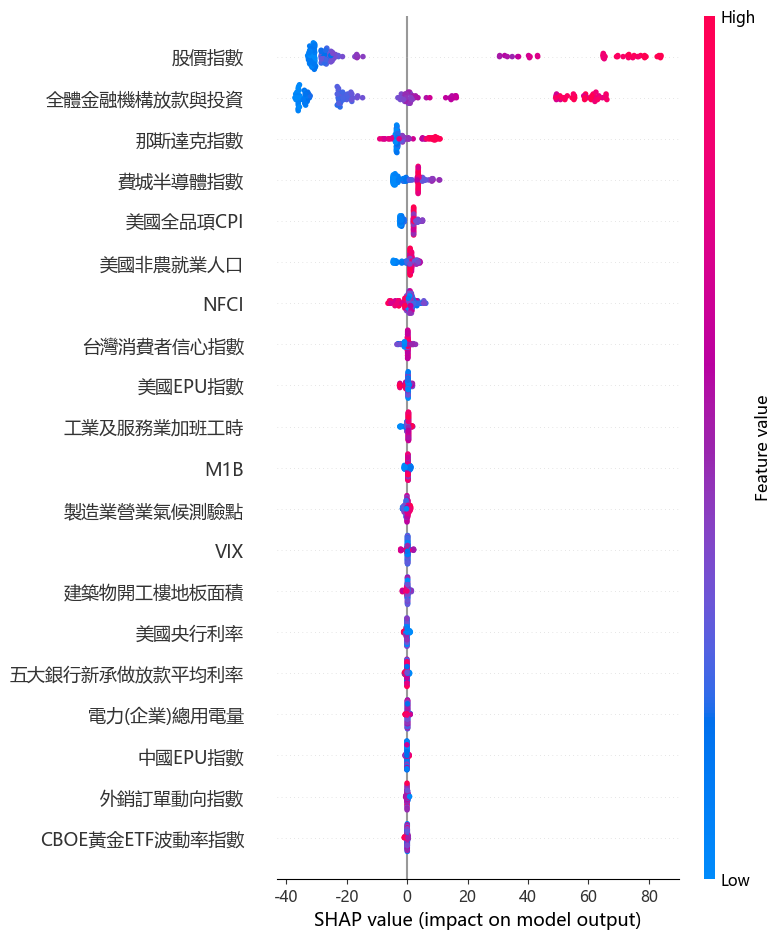

Feature importance based on SHAP:
           Feature  Importance
1             股價指數   37.495988
14     全體金融機構放款與投資   29.770236
33          那斯達克指數    4.021115
34         費城半導體指數    3.752162
29        美國全品項CPI    2.409298
28        美國非農就業人口    2.055562
31            NFCI    1.670005
22       台灣消費者信心指數    0.571466
26         美國EPU指數    0.470394
13      工業及服務業加班工時    0.469219
4              M1B    0.430852
0       製造業營業氣候測驗點    0.400569
24             VIX    0.302799
6       建築物開工樓地板面積    0.229785
23          美國央行利率    0.203687
16   五大銀行新承做放款平均利率    0.163723
10      電力(企業)總用電量    0.144764
25         中國EPU指數    0.122544
2         外銷訂單動向指數    0.119124
32  CBOE黃金ETF波動率指數    0.108732
20       台灣消費者物價指數    0.105326
18         製造業存貨價值    0.070696
27         全球GPR指數    0.060314
17             失業率    0.051537
7           工業生產指數    0.049603
21      消費者物價指數年增率    0.047084
3   工業及服務業受僱員工淨進入率    0.034422
30       美國消費者信心指數    0.032474
15   製造業單位產出勞動成本指數    0.032371
8         製造業銷售量指數    0.028851
19   

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import shap
import warnings
import matplotlib.pyplot as plt

# 设置 matplotlib 字体为可以显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 适用于 Windows 系统，可以使用其他支持中文的字体名称
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

class LightGBM:    

    def shap_feature_importance(train_X, train_Y, params, isClassifier=True):
        """
        使用 SHAP 计算特征重要性

        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        params (dict): 模型参数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。

        Returns:
        DataFrame: 特征重要性。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier(**params)
            else:
                model = lgb.LGBMRegressor(**params)
            
            model.fit(train_X, train_Y)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(train_X)
            
            # 计算特征重要性
            feature_importance_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': np.abs(shap_values).mean(axis=0)})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
            
            # 可视化特征重要性
            shap.summary_plot(shap_values, train_X)
            
            return feature_importance_df
        except Exception as e:
            print('shap_feature_importance has error: ' + str(e))
            return None

    def build_model(train_X, train_Y, val_X, val_Y, params, scoring, isClassifier=True):
        """
        使用给定的训练集和验证集进行模型训练和评估。

        Args:
        train_X (DataFrame): 训练集特征。
        train_Y (Series or array-like): 训练集目标值。
        val_X (DataFrame): 验证集特征。
        val_Y (Series or array-like): 验证集目标值。
        params (dict): 模型参数。
        scoring (dict): 评估指标。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。

        Returns:
        object: 训练好的模型。
        dict: 验证集上的评估结果。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier(**params)
            else:
                model = lgb.LGBMRegressor(**params)

            model.fit(train_X, train_Y)
            
            # 在验证集上进行预测
            val_pred = model.predict(val_X)
            
            # 计算评估指标
            scores = {}
            for metric_name, metric_func in scoring.items():
                if metric_name == 'r2_score':
                    scores[metric_name] = r2_score(val_Y, val_pred)
                elif metric_name == 'mae':
                    scores[metric_name] = mean_absolute_error(val_Y, val_pred)
                elif metric_name == 'mape':
                    scores[metric_name] = mean_absolute_percentage_error(val_Y, val_pred)
            
            return model, scores
        except Exception as e:
            print('build_model has error: ' + str(e))
            return None, None

    def grid_tune(train_X, train_Y, fold_time, isClassifier=True, param_grid=None):
        """
        使用 GridSearchCV 调参，即每种参数组合都尝试，返回最佳模型。

        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        fold_time (int): 交叉验证次数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
        param_grid (dict or None, optional): 网格搜索的参数网格，默认为 None。

        Returns:
        object: 最佳模型。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier()
            else:
                model = lgb.LGBMRegressor()
            
            tscv = TimeSeriesSplit(n_splits=fold_time)

            grid_search = GridSearchCV(estimator=model,
                                       param_grid=param_grid,
                                       cv=tscv,
                                       n_jobs=-1)
            grid_search.fit(train_X, train_Y)
            best_model = grid_search.best_estimator_
            return best_model
        except Exception as e:
            print('grid_tune has error: ' + str(e))
            return None 

    def random_tune(train_X, train_Y, fold_time, isClassifier=True, param_grid=None): 
        """
        使用 RandomizedSearchCV 进行随机调参，返回最佳模型。

        Args:
        train_X (DataFrame): 训练数据集的特征值。
        train_Y (Series or array-like): 训练数据集的目标值。
        fold_time (int): 交叉验证次数。
        isClassifier (bool, optional): 是否使用分类器，默认为 True。
        param_grid (dict or None, optional): 随机搜索的参数网格，默认为 None。

        Returns:
        object: 最佳模型。
        """
        try:
            if isClassifier:
                model = lgb.LGBMClassifier()
            else:
                model = lgb.LGBMRegressor()
            
            tscv = TimeSeriesSplit(n_splits=fold_time)

            random_search = RandomizedSearchCV(estimator=model,
                                               param_distributions=param_grid,
                                               cv=tscv,
                                               n_jobs=-1)
            random_search.fit(train_X, train_Y)
            best_model = random_search.best_estimator_
            return best_model
        except Exception as e:
            print('random_tune has error: ' + str(e))
            return None

# 加载数据
# Convert the '日期' column to datetime and sort by date
df = pd.read_csv('MacroData.csv')
df['日期'] = pd.to_datetime(df['日期'], format='%b-%y')
df = df.sort_values('日期').reset_index(drop=True)

# Define the target variable '市半導體' and features (all other columns except '日期' and target)
target = '市半導體'
features = df.drop(columns=['日期', target]).columns

# 按时间顺序划分数据集
split_date = '2023-12-01'
train = df[df['日期'] < split_date]
test = df[df['日期'] >= split_date]

# 训练集和测试集
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# 设置模型参数
params = {
    'boosting_type': 'dart',  # 生成方式 gbdt, dart, rf
    'n_estimators': 100,
    'learning_rate': 0.05,
    'n_jobs': -1,  # 使用所有CPU
    'random_state': 7,
    'verbose': 0,
    'min_data_in_leaf':5
    # 移除 min_data_in_leaf 和 min_child_samples
}

# 评价指标
scoring = {
    'r2_score': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error),
}

# 使用 SHAP 进行特征重要性分析
try:
    feature_importance_df = LightGBM.shap_feature_importance(X_train, y_train, params=params, isClassifier=False)
    if feature_importance_df is not None:
        print("Feature importance based on SHAP:")
        print(feature_importance_df)
        important_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature'].tolist()
except Exception as e:
    print(f'Error during SHAP feature importance analysis: {str(e)}')

# 使用 TimeSeriesSplit 进行交叉验证
fold_time = 5
model = None
cv_results = []
split_num = 1

try:
    # 使用 TimeSeriesSplit 进行交叉验证
    tscv = TimeSeriesSplit(n_splits=fold_time)
    for train_index, val_index in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # 使用重要特征进行训练
        X_tr_important = X_tr[important_features]
        X_val_important = X_val[important_features]

        # 使用 LightGBM 自定义类进行建模和评估
        model, scores = LightGBM.build_model(
            X_tr_important, y_tr, X_val_important, y_val,
            params=params, scoring=scoring, isClassifier=False
        )

        if model is not None:
            y_pred_val = model.predict(X_val_important)
            mae = mean_absolute_error(y_val, y_pred_val)
            print(f'折数 {split_num}:')
            print(f'当前折的 MAE: {mae}')
            print(f'当前折的预测值: {y_pred_val}')
            print(f'当前折的验证集索引: {val_index}')
            print(f'当前折的评估结果:')
            print(scores)
            cv_results.append(scores)
            split_num += 1
except Exception as e:
    print(f'Error during TimeSeriesSplit cross-validation: {str(e)}')

# 使用 TimeSeriesSplit 进行参数调优
param_grid = {
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'n_estimators': np.arange(100, 300, 50),
    'boosting_type': ['gbdt', 'dart'],
    'random_state': [7],
}

best_model = None
try:
    best_model = LightGBM.grid_tune(X_train[important_features], y_train, fold_time=fold_time, param_grid=param_grid, isClassifier=False)
    if best_model is not None:
        y_pred_best = best_model.predict(X_test[important_features])
        mae_best = mean_absolute_error(y_test, y_pred_best)
        print(f'MAE after parameter tuning: {mae_best}')
        print(f'Predicted values using the best model: {y_pred_best}')

        # 创建包含真实值和预测值的 DataFrame
        comparison_df = pd.DataFrame({
            '日期': test['日期'].reset_index(drop=True),
            '真实值': y_test.reset_index(drop=True),
            '预测值': y_pred_best
        })

        # 打印比较结果
        print("真实值与预测值的比较:")
        print(comparison_df)
except Exception as e:
    print(f'Error during parameter tuning: {str(e)}')

# 使用 TimeSeriesSplit 进行随机参数调优
best_random_model = None
try:
    best_random_model = LightGBM.random_tune(X_train[important_features], y_train, fold_time=fold_time, param_grid=param_grid, isClassifier=False)
    if best_random_model is not None:
        y_pred_random = best_random_model.predict(X_test[important_features])
        mae_random = mean_absolute_error(y_test, y_pred_random)
        print(f'MAE after random parameter tuning: {mae_random}')
        print(f'Predicted values using the best random model: {y_pred_random}')

        # 创建包含真实值和预测值的 DataFrame
        comparison_df_random = pd.DataFrame({
            '日期': test['日期'].reset_index(drop=True),
            '真实值': y_test.reset_index(drop=True),
            '随机调优预测值': y_pred_random
        })

        # 打印比较结果
        print("真实值与随机调优预测值的比较:")
        print(comparison_df_random)
except Exception as e:
    print(f'Error during random parameter tuning: {str(e)}')


In [25]:
best_params = best_model.get_params()
for param, value in best_params.items():
        print(f"{param}: {value}")

boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.3
max_depth: 3
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 250
n_jobs: None
num_leaves: 31
objective: None
random_state: 7
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0


In [27]:
best_params1 = best_random_model.get_params()
for param, value in best_params1.items():
        print(f"{param}: {value}")

boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.4
max_depth: 3
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 150
n_jobs: None
num_leaves: 31
objective: None
random_state: 7
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0
